In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def banana_distribution(x, y):
    return np.exp(-((x**2 + y**2 - 1)**2 / 0.3) - ((y - x**2)**2 / 0.3))

In [4]:
def metropolis_sampling(n_samples=30000, step_size=0.1):
    samples = []
    x, y = 0.0, 0.0  # Start from the origin
    
    for _ in range(n_samples):
        x_new, y_new = np.random.normal(x, step_size), np.random.normal(y, step_size)
        acceptance_ratio = banana_distribution(x_new, y_new) / banana_distribution(x, y)
        
        if np.random.rand() < acceptance_ratio:
            x, y = x_new, y_new
        
        samples.append([x, y])
    
    return np.array(samples)

Generate samples

In [5]:
samples = metropolis_sampling()

Create 3D histogram

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

In [7]:
hist, xedges, yedges = np.histogram2d(samples[:, 0], samples[:, 1], bins=30, density=True)
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")

In [8]:
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dx = dy = np.ones_like(zpos) * (xedges[1] - xedges[0])
dz = hist.ravel()

In [9]:
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Density")
ax.set_title("3D Histogram of Samples from 2D Banana Distribution")

Text(0.5, 0.92, '3D Histogram of Samples from 2D Banana Distribution')

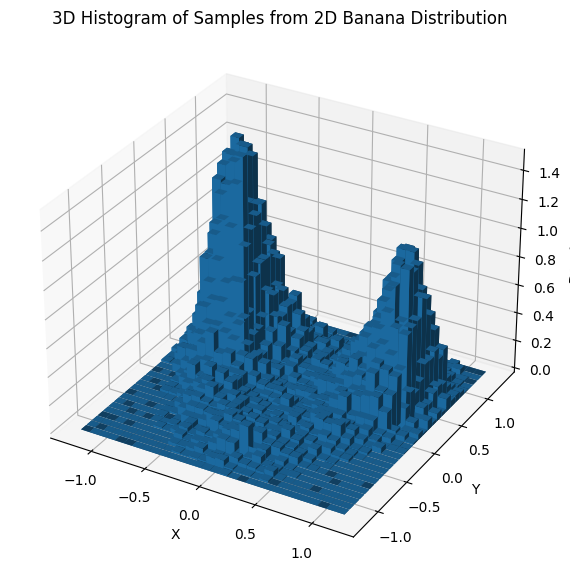

In [10]:
plt.show()